In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.stats as st
from PIL import Image
from sklearn.metrics import mean_squared_error
from PIL import Image, ImageDraw, ImageFont


# Ejercicio 1

[1, 4, 1, 1, 1, 1, 4, 2, 1, 3]


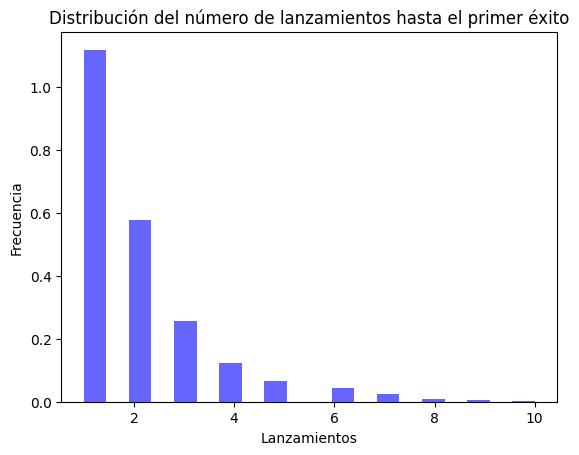

In [4]:


n = 1
p = 0.5
N = 1000
simulaciones = [st.geom.rvs(p, size=1)[0] for _ in range(N)]

print(simulaciones[:10])

plt.hist(simulaciones, bins=20, density=True, alpha=0.6, color='b')
plt.title("Distribución del número de lanzamientos hasta el primer éxito")
plt.xlabel("Lanzamientos")
plt.ylabel("Frecuencia")
plt.show()


# Ejercicio 2

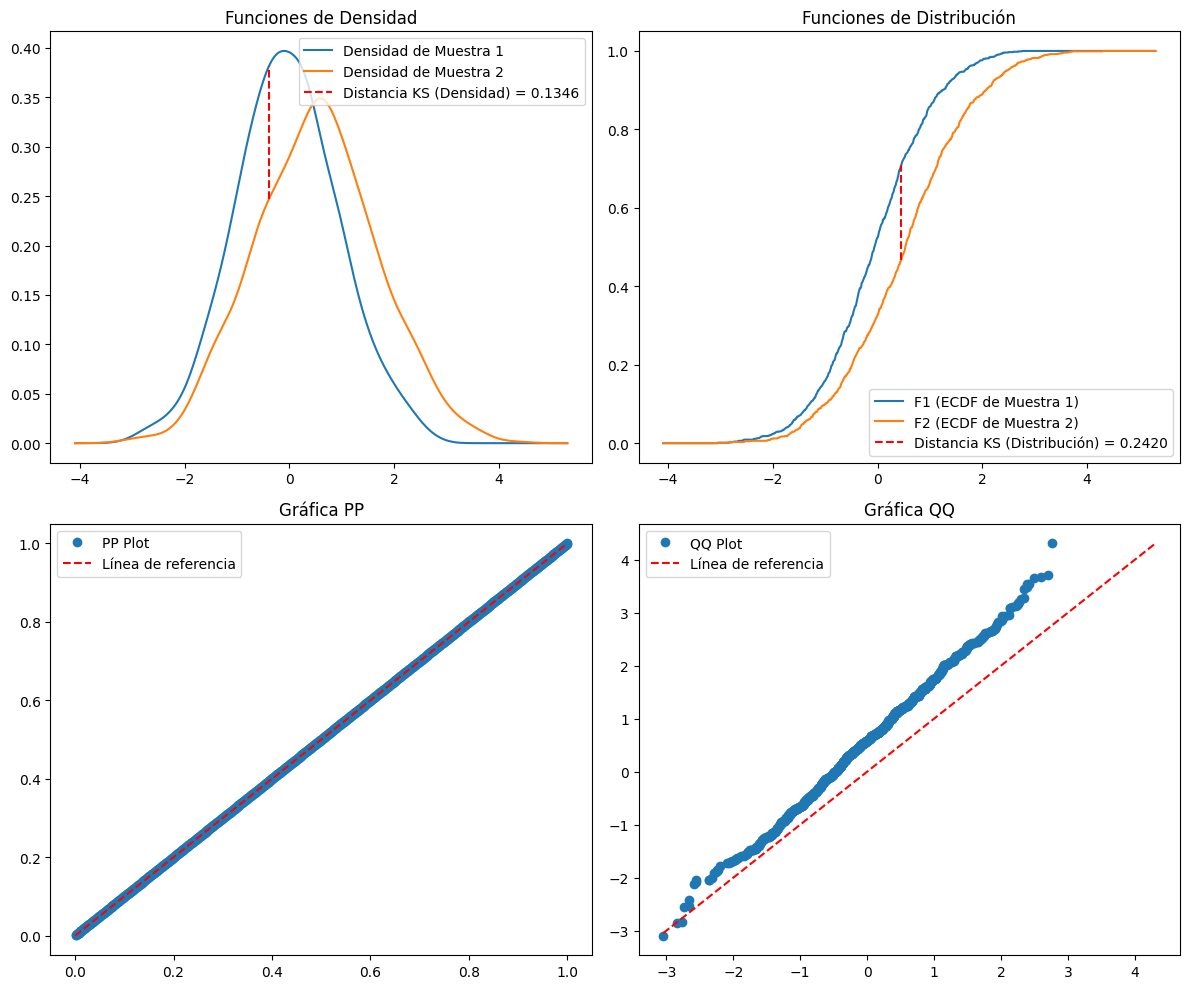

Distancia KS (Distribución): 0.2420
Distancia KS (Densidad): 0.1346
Estadístico de la prueba KS: 0.2430
P-valor de la prueba KS: 0.0000


In [5]:
def comparar_muestras(muestra1, muestra2, tipo1='datos', tipo2='datos', dist1=None, dist2=None):
    """
    Compara dos muestras mediante funciones de densidad, distribución, PP y QQ plots.
    También calcula la distancia de Kolmogorov-Smirnov (KS) y realiza una prueba de hipótesis KS.

    Parámetros:
    - muestra1: array-like o parámetros de distribución.
    - muestra2: array-like o parámetros de distribución.
    - tipo1: 'datos' o 'teorica'.
    - tipo2: 'datos' o 'teorica'.
    - dist1: distribución teórica para muestra1 (si aplica).
    - dist2: distribución teórica para muestra2 (si aplica).
    """
    x = np.linspace(min(np.min(muestra1), np.min(muestra2)) - 1, 
                    max(np.max(muestra1), np.max(muestra2)) + 1, 1000)

    plt.figure(figsize=(12, 10))

    # a) Funciones de densidad
    plt.subplot(2, 2, 1)
    if tipo1 == 'datos':
        dens1 = st.gaussian_kde(muestra1)
        plt.plot(x, dens1(x), label='Densidad de Muestra 1')
    else:
        plt.plot(x, dist1.pdf(x), label='Densidad Teórica 1')

    if tipo2 == 'datos':
        dens2 = st.gaussian_kde(muestra2)
        plt.plot(x, dens2(x), label='Densidad de Muestra 2')
    else:
        plt.plot(x, dist2.pdf(x), label='Densidad Teórica 2')

    # Calcular la distancia de Kolmogorov-Smirnov (KS) en la densidad
    ks_statistic_density = np.max(np.abs(dens1(x) - dens2(x)))
    ks_index_density = np.argmax(np.abs(dens1(x) - dens2(x)))
    ks_x_density = x[ks_index_density]

    # Marcar el punto KS en la gráfica de densidad
    plt.vlines(ks_x_density, min(dens1(x)[ks_index_density], dens2(x)[ks_index_density]), 
               max(dens1(x)[ks_index_density], dens2(x)[ks_index_density]), 
               colors='r', linestyles='dashed', label=f'Distancia KS (Densidad) = {ks_statistic_density:.4f}')

    plt.title('Funciones de Densidad')
    plt.legend()

    # b) Funciones de distribución acumulada
    plt.subplot(2, 2, 2)
    if tipo1 == 'datos':
        ecdf1 = np.array([np.mean(muestra1 <= xi) for xi in x])
        plt.plot(x, ecdf1, label='F1 (ECDF de Muestra 1)')
    else:
        ecdf1 = dist1.cdf(x)
        plt.plot(x, ecdf1, label='F1 (CDF Teórica 1)')

    if tipo2 == 'datos':
        ecdf2 = np.array([np.mean(muestra2 <= xi) for xi in x])
        plt.plot(x, ecdf2, label='F2 (ECDF de Muestra 2)')
    else:
        ecdf2 = dist2.cdf(x)
        plt.plot(x, ecdf2, label='F2 (CDF Teórica 2)')

    # Calcular la distancia de Kolmogorov-Smirnov (KS) en la distribución
    ks_statistic = np.max(np.abs(ecdf1 - ecdf2))
    ks_index = np.argmax(np.abs(ecdf1 - ecdf2))
    ks_x = x[ks_index]

    # Marcar el punto KS en la gráfica de distribución
    plt.vlines(ks_x, min(ecdf1[ks_index], ecdf2[ks_index]), max(ecdf1[ks_index], ecdf2[ks_index]), 
               colors='r', linestyles='dashed', label=f'Distancia KS (Distribución) = {ks_statistic:.4f}')

    plt.title('Funciones de Distribución')
    plt.legend()

    # c) Gráfica PP
    plt.subplot(2, 2, 3)
    if tipo1 == 'datos':
        pp_x = np.linspace(0, 1, len(muestra1))
        pp_y1 = np.sort(np.array([np.mean(muestra1 <= val) for val in muestra1]))
    else:
        pp_x = np.linspace(0, 1, len(muestra1))
        pp_y1 = np.sort(dist1.cdf(muestra1))

    if tipo2 == 'datos':
        pp_y2 = np.sort(np.array([np.mean(muestra2 <= val) for val in muestra2]))
    else:
        pp_y2 = np.sort(dist2.cdf(muestra2))

    plt.plot(pp_y1, pp_y2, marker='o', linestyle='', label='PP Plot')
    plt.plot([0, 1], [0, 1], 'r--', label='Línea de referencia')
    plt.title('Gráfica PP')
    plt.legend()

    # d) Gráfica QQ
    plt.subplot(2, 2, 4)
    quantiles = np.linspace(0, 1, min(len(muestra1), len(muestra2)))
    if tipo1 == 'datos':
        qq1 = np.quantile(muestra1, quantiles)
    else:
        qq1 = dist1.ppf(quantiles)

    if tipo2 == 'datos':
        qq2 = np.quantile(muestra2, quantiles)
    else:
        qq2 = dist2.ppf(quantiles)

    plt.plot(qq1, qq2, marker='o', linestyle='', label='QQ Plot')
    plt.plot([min(qq1), max(qq2)], [min(qq1), max(qq2)], 'r--', label='Línea de referencia')
    plt.title('Gráfica QQ')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Prueba de hipótesis de Kolmogorov-Smirnov
    ks_test = st.ks_2samp(muestra1, muestra2)
    print(f'Distancia KS (Distribución): {ks_statistic:.4f}')
    print(f'Distancia KS (Densidad): {ks_statistic_density:.4f}')
    print(f'Estadístico de la prueba KS: {ks_test.statistic:.4f}')
    print(f'P-valor de la prueba KS: {ks_test.pvalue:.4f}')


# Ejemplo de uso
np.random.seed(0)
muestra1 = np.random.normal(loc=0, scale=1, size=1000)
muestra2 = np.random.normal(loc=0.5, scale=1.2, size=1000)

comparar_muestras(muestra1, muestra2)


# Ejercicio 3

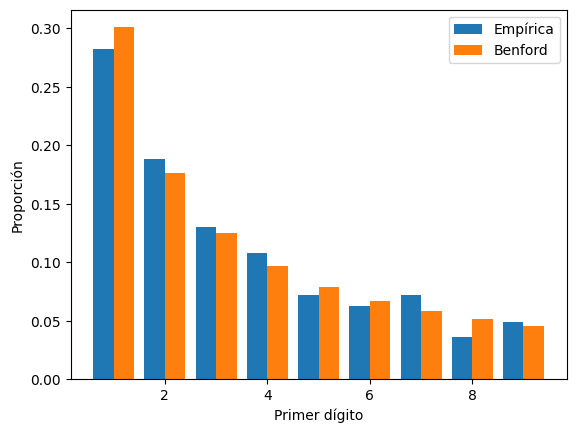

In [ ]:
df = pd.read_csv('CSV/areas.csv', sep=';')

areas = df["Area in square kilometres"].dropna().astype(str)

# 2. Extraer el primer dígito no nulo
def extraer_primer_digito(valor):
    for char in valor:
        if char.isdigit() and char != '0':
            return int(char)
    return None


primeros_digitos = areas.apply(extraer_primer_digito)
primeros_digitos = primeros_digitos.dropna()

conteo = primeros_digitos.value_counts().sort_index()
frecuencia_empirica = conteo / conteo.sum()

digitos = np.arange(1,10)
benford = np.log10(1 + 1/digitos)

plt.bar(digitos - 0.2, frecuencia_empirica.values, width=0.4, label='Empírica')
plt.bar(digitos + 0.2, benford, width=0.4, label='Benford')
plt.xlabel('Primer dígito')
plt.ylabel('Proporción')
plt.legend()
plt.show()

ecdf = np.cumsum([frecuencia_empirica.get(d, 0) for d in digitos])
cdf_benford = np.cumsum(benford)

D = np.max(np.abs(ecdf - cdf_benford))
print("Estadística K–S D =", D)


# Ejercicio 4 Distribucion Gaussiana

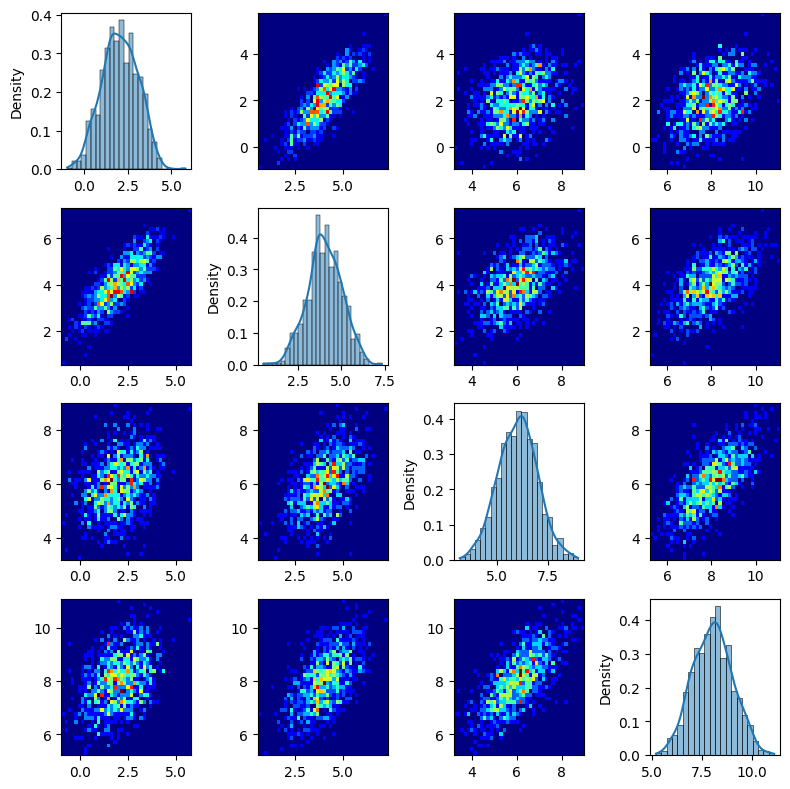

Media teórica:
 [2 4 6 8]
Media de la muestra:
 [2.05293146 4.05516668 6.03556799 8.04817682]

Covarianza teórica:
 [[1.  0.8 0.3 0.4]
 [0.8 1.  0.5 0.6]
 [0.3 0.5 1.  0.7]
 [0.4 0.6 0.7 1. ]]
Covarianza de la muestra:
 [[1.05362216 0.8122856  0.30195615 0.38717855]
 [0.8122856  0.9585662  0.47261129 0.55434638]
 [0.30195615 0.47261129 0.92066102 0.65739982]
 [0.38717855 0.55434638 0.65739982 0.96766721]]


In [7]:
# Parametros
n_samples = 1000  
n_dim = 4  

# Media 
mu = np.array([2, 4, 6, 8])

# Matriz de covarianza 
cov = np.array([
    [1.0, 0.8, 0.3, 0.4],
    [0.8, 1.0, 0.5, 0.6],
    [0.3, 0.5, 1.0, 0.7],
    [0.4, 0.6, 0.7, 1.0]
])

if not np.all(np.linalg.eigvals(cov) > 0):
    raise ValueError("La matriz de covarianza no es definida positiva.")

# Muestra aleatoria
samples = np.random.multivariate_normal(mean=mu, cov=cov, size=n_samples)

# Visualización con pyplot
plt.figure(figsize=(8, 8))
for i in range(0, n_dim):
    for j in range(0, n_dim):
        plt.subplot(n_dim, n_dim, n_dim * i + j + 1)
        if i == j:
            sns.histplot(samples[:, i], kde=True, stat="density")
        else:
            plt.hist2d(samples[:, j], samples[:, i], bins=(40, 40), cmap=plt.cm.jet)
plt.tight_layout()
plt.show()

# Medidas teoricas versus las de la muestra
sample_mean = np.mean(samples, axis=0)
sample_cov = np.cov(samples, rowvar=False)

print("Media teórica:\n", mu)
print("Media de la muestra:\n", sample_mean)
print("\nCovarianza teórica:\n", cov)
print("Covarianza de la muestra:\n", sample_cov)


# Ejercicio 5 PCA

       0     1     2     3     4     5     6     7     8     9    10    11  \
0   -3.9  -4.5  -2.3   1.2   5.4  10.9  15.5  15.3  11.6   6.9   3.4  -1.5   
1   -7.1  -7.5  -3.1   2.3   8.5  14.5  18.3  17.8  13.5   8.1   2.9  -3.9   
2   -6.0  -6.1  -1.6   3.3   9.2  14.8  18.2  18.1  13.8   8.6   3.4  -2.9   
3   -4.7  -5.9  -2.5   2.0   7.4  13.2  17.7  17.6  13.5   8.4   3.8  -1.8   
4   -2.7  -3.2   0.3   4.7   9.2  13.4  16.3  16.4  13.6   9.5   5.2  -0.3   
5   -9.2  -8.4  -2.4   4.1  10.8  16.2  19.3  18.2  13.2   7.5   1.4  -6.5   
6  -15.0 -13.1  -5.9   2.9  10.0  15.9  18.4  16.9  11.9   6.1  -1.0 -11.3   
7  -10.2  -9.0  -2.5   5.7  13.0  18.3  20.9  19.6  14.8   8.7   2.0  -6.9   
8  -12.1 -10.8  -4.5   3.3  10.8  16.4  19.1  17.5  12.6   6.6  -0.2  -9.0   
9  -22.8 -21.2 -15.1  -7.2   1.2   8.6  12.6  10.8   5.2  -1.4  -9.0 -19.0   
10 -11.7 -10.9  -4.3   3.6  10.6  15.5  17.8  16.5  12.1   6.6   0.4  -8.2   
11 -18.6 -16.2  -9.4   0.5   8.3  14.1  16.8  15.3  10.0   4.4  

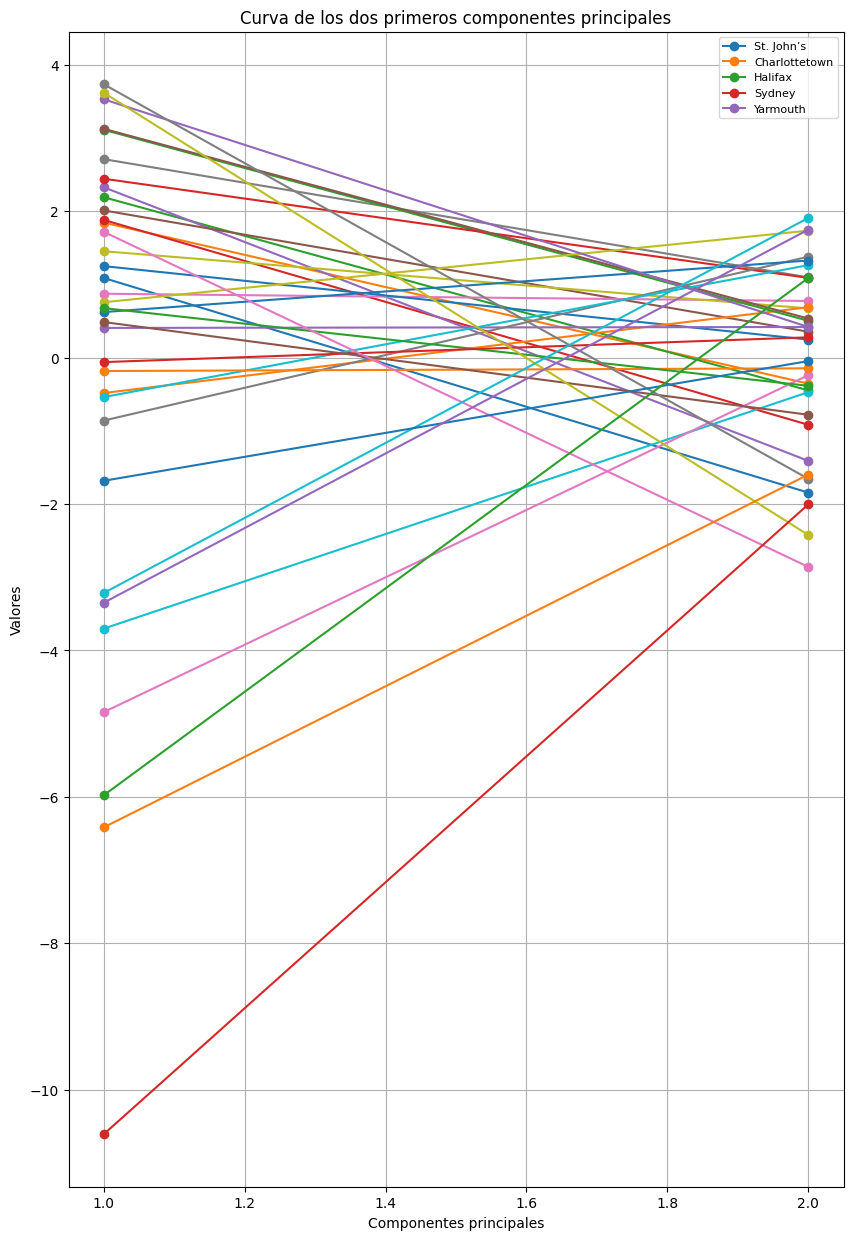

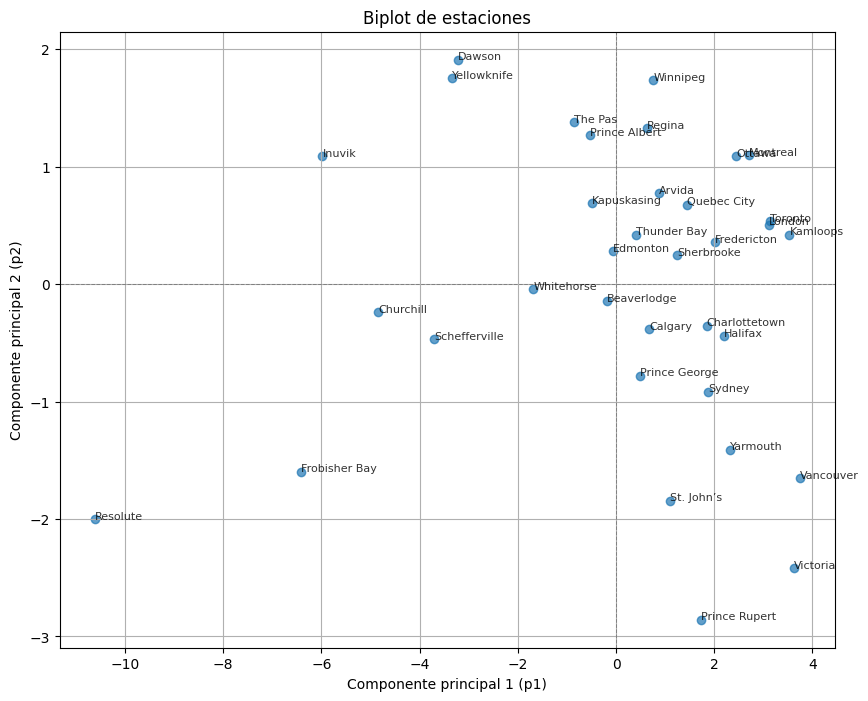

Proporción de varianza explicada por los componentes principales: [0.84836609 0.1243107 ]


In [8]:
weather_data = pd.read_csv('./CSV/weather.csv')

print(weather_data)

# Columnas de enero a diciembre
monthly_data = weather_data.select_dtypes(include=[np.number])

# Estandarizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(monthly_data)

# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Crear un DataFrame con los primeros dos componentes
pca_df = pd.DataFrame(data=principal_components, columns=['p1', 'p2'])
pca_df['Station'] = weather_data['station']  

# Dibujar curva
plt.figure(figsize=(10, 15))
for index, row in pca_df.iterrows():
    plt.plot(range(1, 3), row[['p1', 'p2']], marker='o', label=row['Station'] if index < 5 else "")
plt.xlabel('Componentes principales')
plt.ylabel('Valores')
plt.title('Curva de los dos primeros componentes principales')
plt.legend(loc='upper right', fontsize=8)
plt.grid(True)
plt.show()

# Agrupar y representar en un biplot
plt.figure(figsize=(10, 8))
plt.scatter(pca_df['p1'], pca_df['p2'], alpha=0.7)
for i, station in enumerate(weather_data['station']):
    plt.text(pca_df['p1'][i], pca_df['p2'][i], station, fontsize=8, alpha=0.8)
plt.xlabel('Componente principal 1 (p1)')
plt.ylabel('Componente principal 2 (p2)')
plt.title('Biplot de estaciones')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)
plt.grid(True)
plt.show()

explained_variance = pca.explained_variance_ratio_
print("Proporción de varianza explicada por los componentes principales:", explained_variance)


# Ejercicio 6

Error de reconstrucción (MSE) para k=5: 94.05364192903548


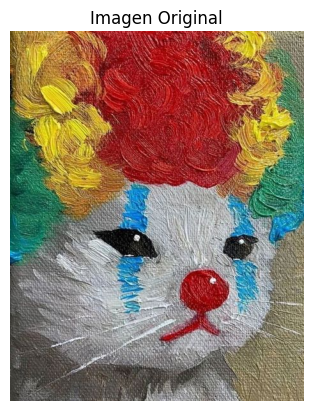

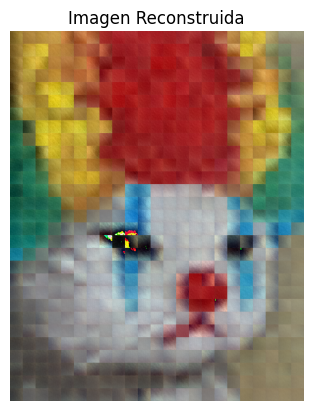

In [9]:
def process_image(image_path, color=True, C=20, k=10):
    image = Image.open(image_path)
    
    if not color:
        image = image.convert('L')

    image_array = np.array(image)

    height, width = image_array.shape[:2]
    new_height = height - (height % C)
    new_width = width - (width % C)
    image_array = image_array[:new_height, :new_width]

    blocks = []
    for i in range(0, image_array.shape[0], C):
        for j in range(0, image_array.shape[1], C):
            block = image_array[i:i+C, j:j+C].flatten()
            blocks.append(block)

    blocks_matrix = np.array(blocks)

    scaler = StandardScaler()
    blocks_matrix_scaled = scaler.fit_transform(blocks_matrix)

    pca = PCA(n_components=k)
    blocks_pca = pca.fit_transform(blocks_matrix_scaled)

    blocks_reconstructed = pca.inverse_transform(blocks_pca)

    blocks_reconstructed = scaler.inverse_transform(blocks_reconstructed)

    reconstructed_image = np.zeros_like(image_array)

    index = 0
    for i in range(0, image_array.shape[0], C):
        for j in range(0, image_array.shape[1], C):
            if color:
                block = blocks_reconstructed[index].reshape(C, C, -1)
            else:
                block = blocks_reconstructed[index].reshape(C, C)
            reconstructed_image[i:i+C, j:j+C] = block
            index += 1

    error = mean_squared_error(image_array.flatten(), reconstructed_image.flatten())
    print(f"Error de reconstrucción (MSE) para k={k}: {error}")

    error_text = f"k={k}, Error={error:.2f}"
    img_pil = Image.fromarray(reconstructed_image.astype(np.uint8))
    draw = ImageDraw.Draw(img_pil)
    font = ImageFont.load_default()  # Cargar fuente por defecto
    draw.text((20, img_pil.height), error_text, fill="black", font=font)

    plt.figure()
    plt.imshow(image_array, cmap='gray' if not color else None)
    plt.title("Imagen Original")
    plt.axis('off')
    plt.show()

    plt.figure()
    plt.imshow(img_pil, cmap='gray' if not color else None)
    plt.title("Imagen Reconstruida")
    plt.axis('off')
    plt.show()

# Ejemplo de uso
process_image('./images/cat.jpg', color=True, C=20, k=5)